# Prediction of Breast Cancer Wiscosin Diagnostic data 

# Understanding of the attributes

#id                              -ID number
#diagnosis                       -The diagnosis of breast tissues (M = malignant, B = benign)
#radius_mean                     -mean of distances from center to points on the perimeter
#texture_mean                    -standard   deviation of gray-scale values
#perimeter_mean                  -mean size of the core tumor
#area_mean
#smoothness_mean                 -mean of local variation in radius lengths
#compactness_mean                -mean of perimeter^2 / area - 1.0
#concavity_mean                  -mean of severity of concave portions of the contour
#concave points_mean             -mean for number of concave portions of the contour
#symmetry_mean
#fractal_dimension_mean          -mean for "coastline approximation" - 1
#radius_sestandard               -error for the mean of distances from center to points on the perimeter
#texture_sestandard              -error for standard deviation of gray-scale values
#perimeter_se
#area_se
#smoothness_sestandard           -error for local variation in radius lengths
#compactness_sestandard          -error for perimeter^2 / area - 1.0
#concavity_sestandard            -error for severity of concave portions of the contour
#concave points_sestandard       -error for number of concave portions of the contour
#symmetry_se
#fractal_dimension_sestandard    -error for "coastline approximation" - 1
#radius_worst                    -"worst" or largest mean value for mean of distances from center to points on the perimeter
#texture_worst                   -"worst" or largest mean value for standard deviation of gray-scale values
#perimeter_worst
#area_worst
#smoothness_worst                -"worst" or largest mean value for local variation in radius lengths
#compactness_worst               -"worst" or largest mean value for perimeter^2 / area - 1.0
#concavity_worst                 -"worst" or largest mean value for severity of concave portions of the contour
#concave points_worst            -"worst" or largest mean value for number of concave portions of the contour
#symmetry_worst
#fractal_dimension_worst         -"worst" or largest mean value for "coastline approximation" - 1


# Import all libraries to set the environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# to install new version of seaborn 
# !conda install -y -c anaconda seaborn=0.9.0

One of the method to open the file in Jupyter Notebook (Converted wdbc.data to bc.csv also)

In [2]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data > bc.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  121k  100  121k    0     0   431k      0 --:--:-- --:--:-- --:--:--  431k


Assigning names to all the attributes(columns) of the Breast Cancer Wiscosin Diagnostic dataset.

In [3]:
cancer_data=pd.read_csv('bc.csv',names=['Id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']);

#cancer_data = pd.read_csv('bc.csv')

In [4]:
print(cancer_data.columns)

Index(['Id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
cancer_data.head(5)

,Id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Check for missing or null data in the dataset

cancer_data.isnull().sum()
cancer_data.isna().sum()

Id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# Converting data into label and feature vectors

del cancer_data['Id']
X = cancer_data.iloc[:, 1:30]
#X = X1.iloc[:,1:30]
Y = cancer_data.iloc[:, 30]

In [8]:
Y = cancer_data['diagnosis']
Y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

Print the current verstion of seaborn library

In [9]:
print(sns.__version__)

0.9.0


Determine the class size for diagnostic class 'diagnostic'. M = Malignent, B = Benign 

In [10]:
type(cancer_data)

pandas.core.frame.DataFrame

In [11]:
#(cancer_data.groupby('diagnosis').size())

(cancer_data.groupby('diagnosis').size().reset_index())


,diagnosis,0
0,B,357
1,M,212


Check for the correlation using .corr()

In [12]:
cancer_data.corr()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


## plt.figure(figsize=(6,4))

Pairwise Scatter Plot
Blue = Malignant
Green = Benign

Area ,Perimeter and radius are strongly co related to Benign diagnosis when it increases diagnosis is towards malignancy. With greater the area the more chances to get tumer to be malignent. Smoothness is not giving too much information so which we can remove during feature selection.

Using regression analysis we can conclude that smoothness is not really related to detecction of the tumor(Malignant/benign).
On the other side using regression plot it is visible that if greater the area more chances to get the prediction of the tumor (M/B).



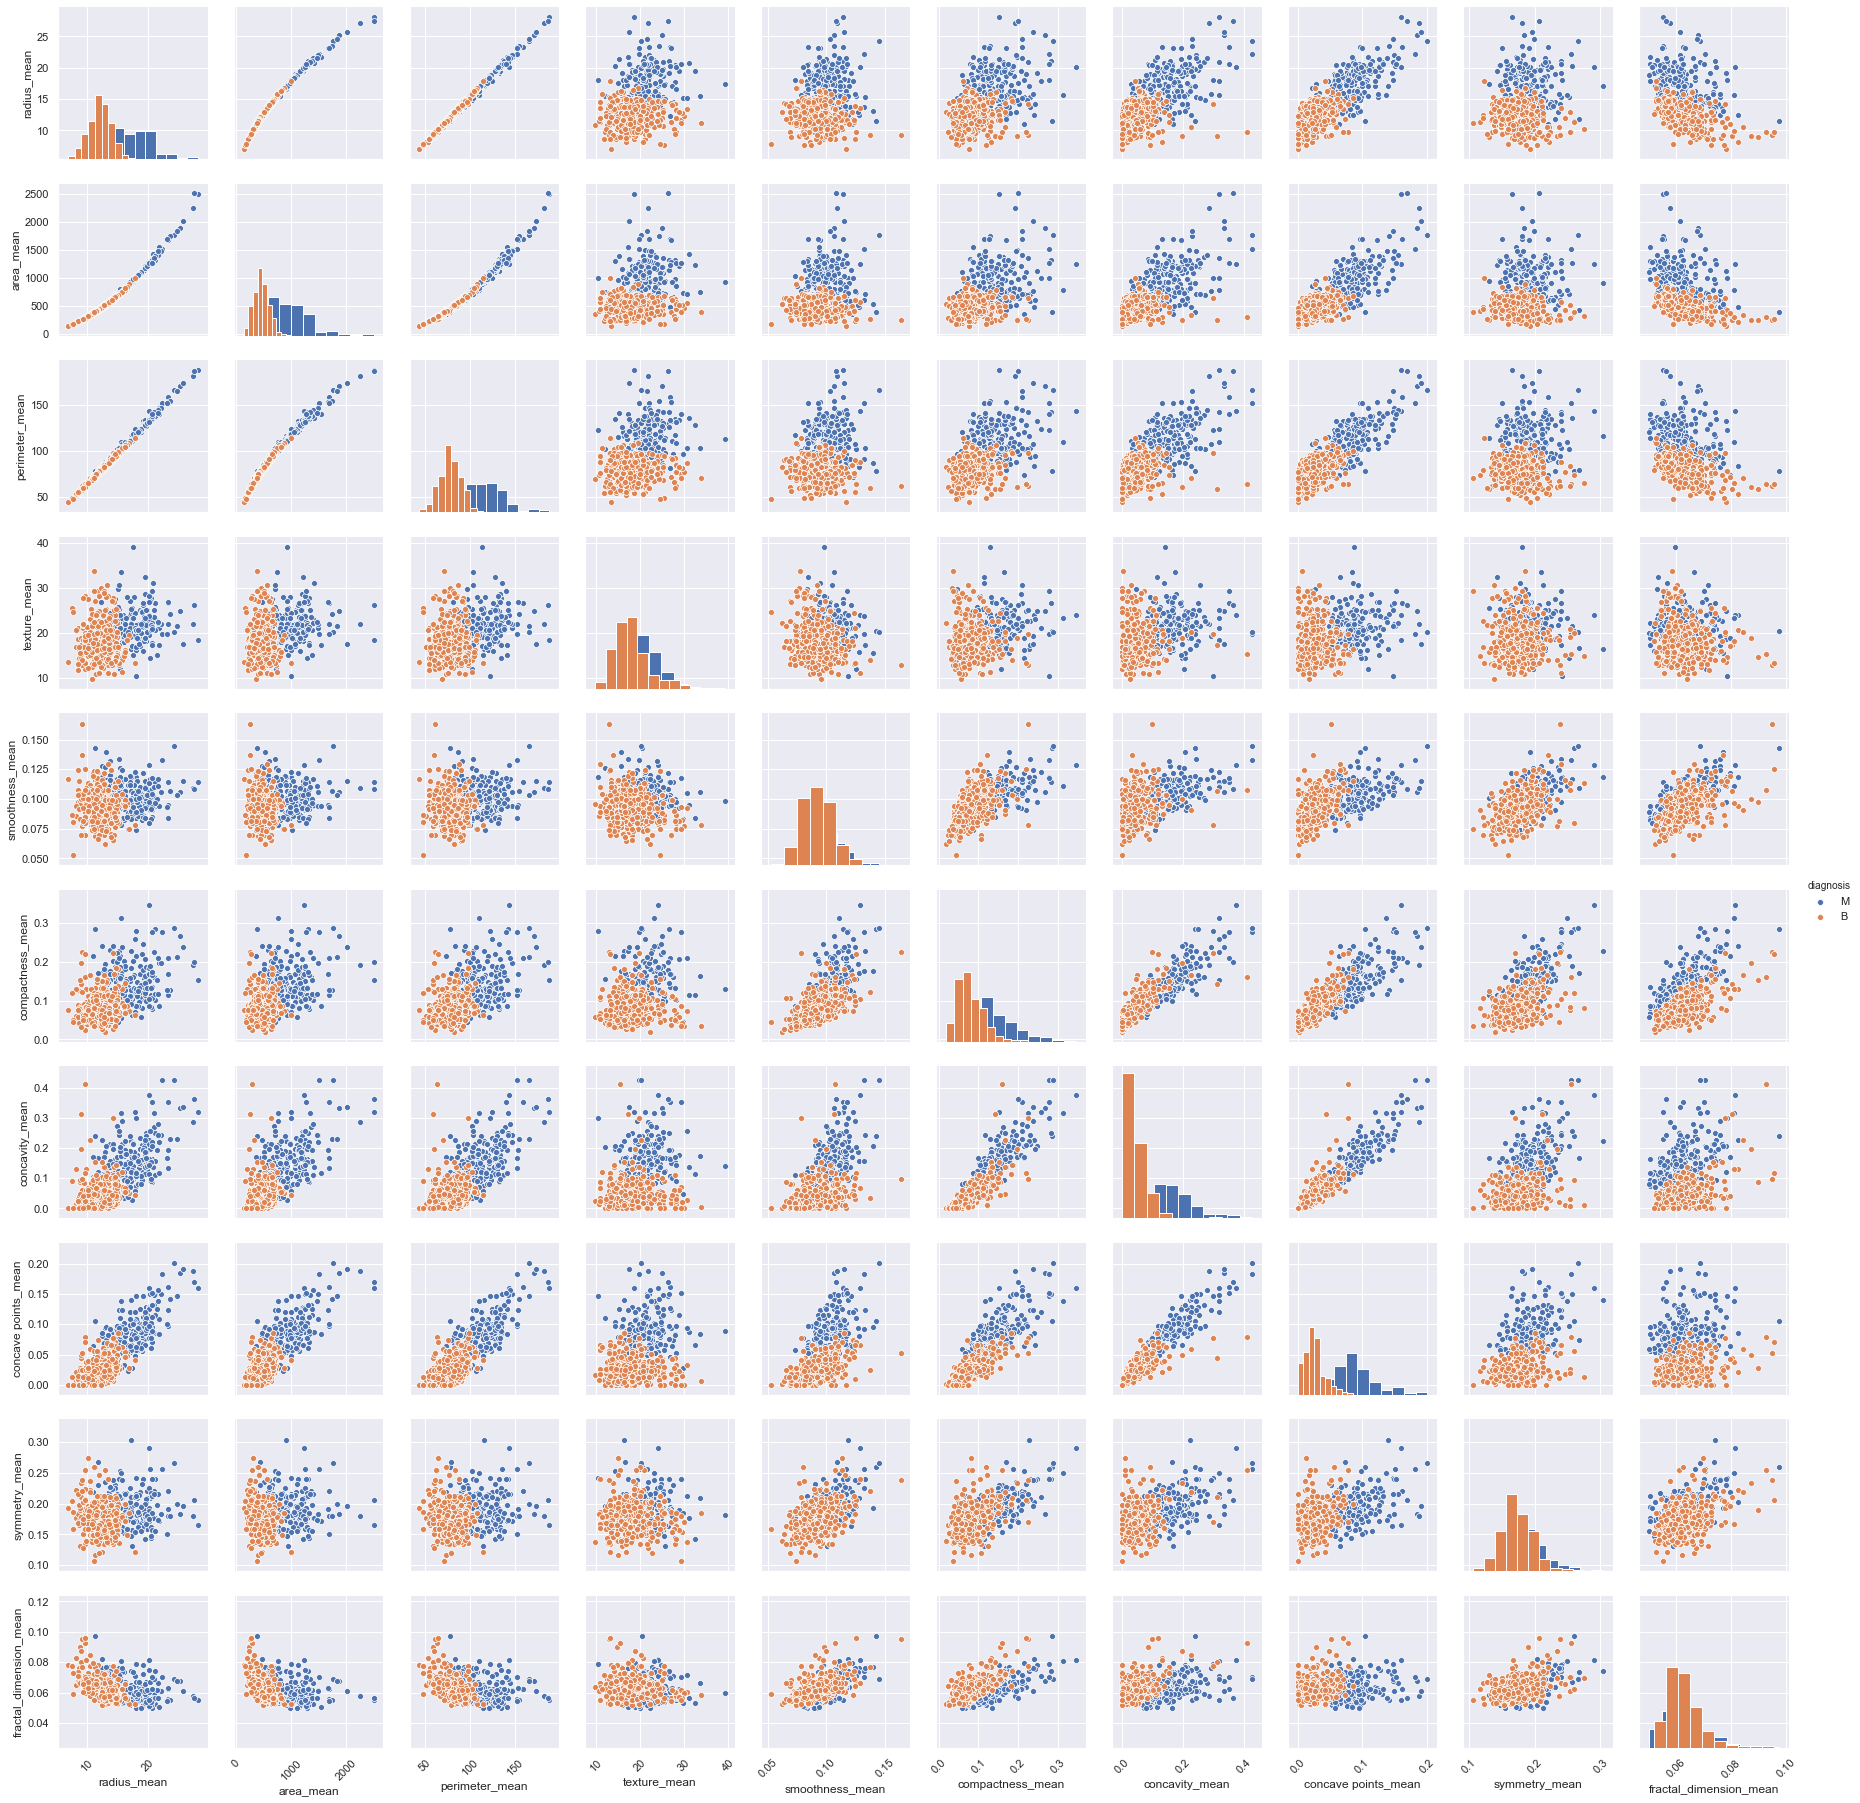

In [13]:
pwise = sns.pairplot(cancer_data[["radius_mean", "area_mean", "perimeter_mean", 'texture_mean', 'smoothness_mean', 
                           'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', "diagnosis",]],
                     hue = "diagnosis", diag_kind = "hist")
#hue=cancer_data["diagnosis"]
for ax in pwise.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

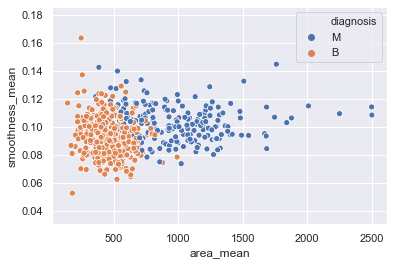

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=cancer_data["area_mean"],y=cancer_data["smoothness_mean"], hue=cancer_data["diagnosis"])

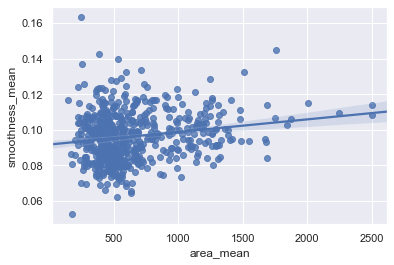

In [15]:
sns.regplot(x=cancer_data["area_mean"],y=cancer_data["smoothness_mean"]) 

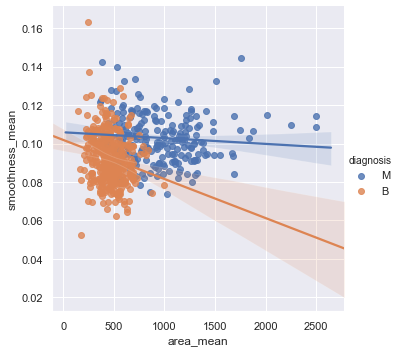

In [16]:
sns.lmplot(x='area_mean', y='smoothness_mean', hue='diagnosis' , data=cancer_data)

Line Plots

We can see a corelation between the radius and the diasnosis. The perimeter is a function of the radius, and therefore it will be correlated to the diagnosis. When the perimeter exceeds a threshold, the diagnosis changes from bening to malignant.

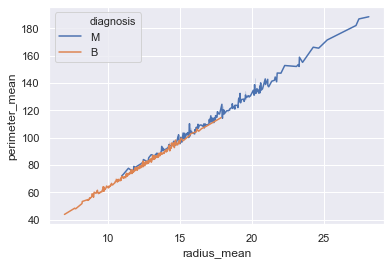

In [17]:
sns.lineplot(x=cancer_data["radius_mean"],y=cancer_data["perimeter_mean"], hue=cancer_data["diagnosis"])


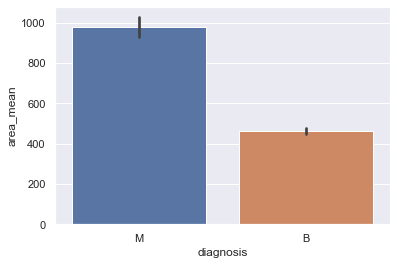

In [18]:
sns.barplot(x=cancer_data['diagnosis'], y=cancer_data['area_mean'])

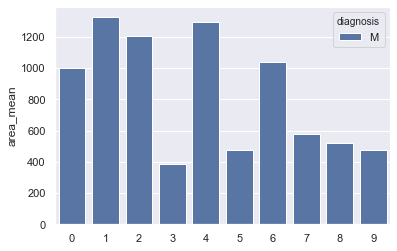

In [19]:
sns.barplot(x=cancer_data[:10].index, y=cancer_data['area_mean'][:10], hue=cancer_data['diagnosis'][:10])

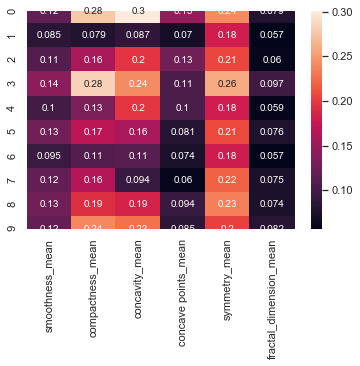

In [20]:
labels = ['smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
heat_cancer_data = cancer_data[labels]
sns.heatmap(data=heat_cancer_data[:10], annot=True)

In [21]:
cancer_data.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [40]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 0)


In [41]:
X_train.shape

(341, 29)

In [42]:
Y_train.shape

(341,)

In [43]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [44]:
#Using Logistic Regression Algorithm to the Training Set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
a = classifier.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
Y_pred = classifier.predict(X_test)

In [46]:
# Performance Metrics

from sklearn.metrics import accuracy_score

pred=a.predict(X_test)
print(accuracy_score(pred,Y_test))
pred

0.9692982456140351


array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M

In [47]:
predf = pd.DataFrame()
predf['predictions'] = pred.tolist()
predf.head()

,predictions
0,M
1,B
2,B
3,B
4,B


In [48]:
Y_test.head()

512    M
457    B
439    B
298    B
37     B
Name: diagnosis, dtype: object